In [74]:
import numpy as np
import pandas as pd
import torch
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import SARIMAX, AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss

In [75]:
N_SERIES, N_FEATURES = 3135, 6
T_AVAILABLE, T_REVEALED, T_PREDICT = 41, 2, 6

X_train = torch.load("X_train.p")
assert X_train.shape == (N_SERIES, T_AVAILABLE, N_FEATURES)
y_train = torch.load("y_train.p")
assert y_train.shape == (N_SERIES, T_AVAILABLE)
X_test = torch.load("X_test.p")
assert X_test.shape == (N_SERIES, T_PREDICT, N_FEATURES)


In [7]:
pop = torch.load("population.p")
cfips_set = set([c for c, y in pop.keys()])


In [9]:
def idx_by_cfips(cfips):
    return sum(c < cfips for c in cfips_set)


In [204]:
idx, val_len, r = torch.randint(low=0, high=3000, size=()), 5, T_AVAILABLE
series = y_train[idx].log()
past, future = series[:-val_len], series[-val_len:]


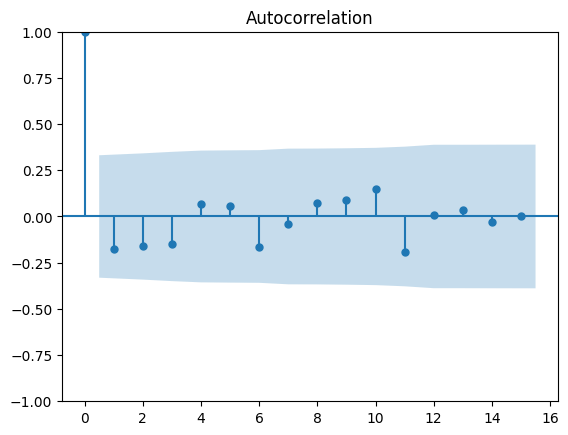

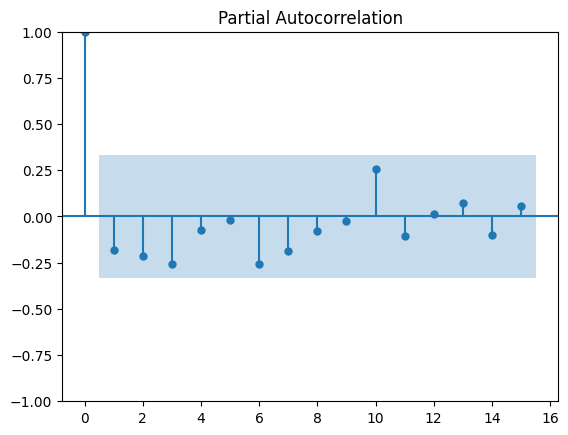

In [205]:
plot_acf(past.diff(), lags=15)
plt.show()
plot_pacf(past.diff(), lags=15)
plt.show()

In [208]:
model = ARIMA(past.numpy(), order=(0, 1, [1, 6, 12])).fit()
# model = ARIMA(past.numpy(), order=(0, 1, 3)).fit()
forecast = torch.tensor(model.predict(start=r - val_len, end=r - 1))


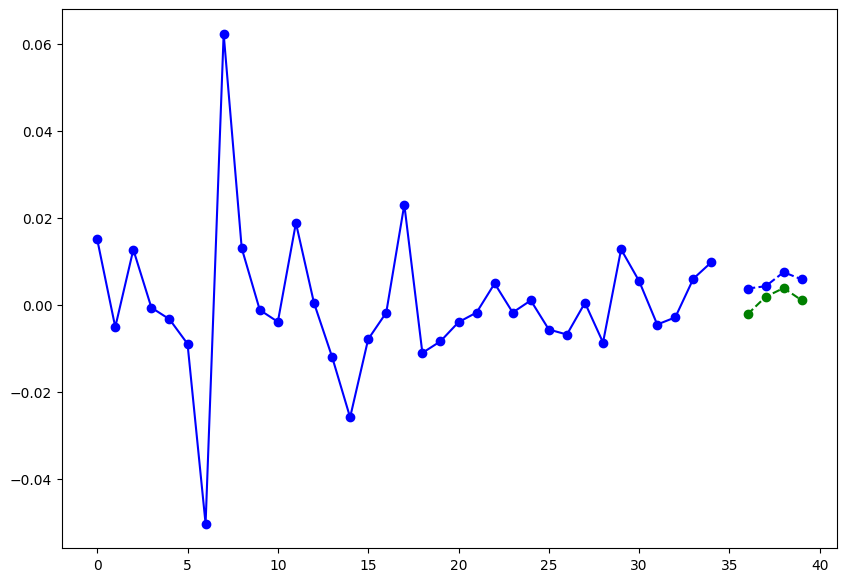

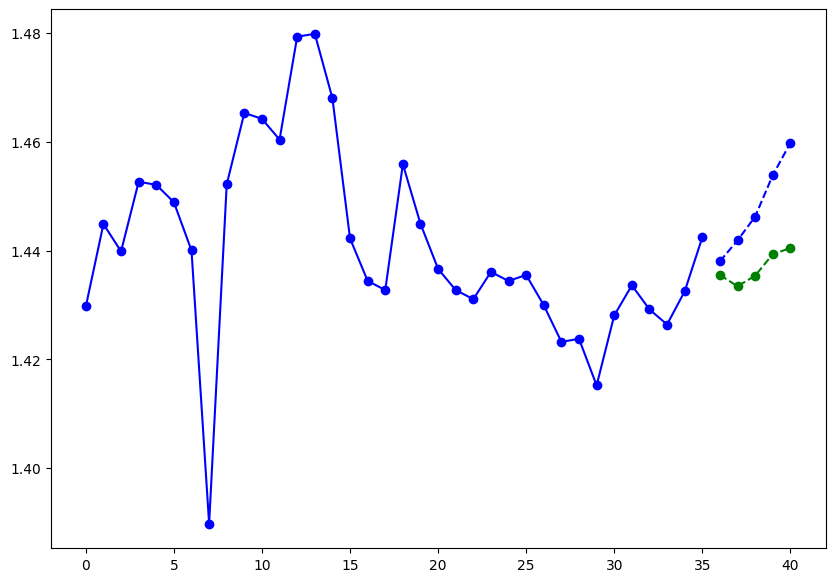

In [209]:
plt.figure(figsize=(10, 7))
plt.plot(np.arange(r - val_len - 1), past.diff(), "-o", color="blue")
plt.plot(np.arange(r - val_len, r - 1), future.diff(), "--o", color="blue")
plt.plot(np.arange(r - val_len, r - 1), forecast.diff(), "--o", color="green")
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(np.arange(r - val_len), past, "-o", color="blue")
plt.plot(np.arange(r - val_len, r), future, "--o", color="blue")
plt.plot(np.arange(r - val_len, r), forecast, "--o", color="green")
plt.show()
